In [1]:
# Setup and imports
%matplotlib inline

import ipywidgets as widgets
import random 
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import pandas as pd
import math

from collections import Counter

sns.set_theme()


# Symmetric crypthography

Let's start with one of the simplest cryptographic system: the symmetric cryptosystem. The main idea about these is that the same key that is used for encrypting is also used for decrypting
requiring for the key to be known by both the sender and the receiver.

![Symmetric cryptography](img/cryptography-symmetric.png)

This also makes for one of the simplest and oldest systems of encryption. Let's see an example.

## The Caesar cipher - A substitution cipher

No cryptography course can go without touching upon the *Caesar cipher*, and the more general ROT-N. While I'm not going to go much into the history of it 
(you can read about it [here](https://en.wikipedia.org/wiki/Caesar_cipher)), the main idea around it was to create a simple substitution of characters to encrypt and decrypt. Like this:

| Plaintext | Ciphertext |
|-----------|------------|
| A         | D          |
| B         | E          |
| C         | F          |
| ...       | ...        |
| W         | Z          |
| X         | A          |
| Y         | B          |
| Z         | C          |

We are substituting each letter for another that is three spaces away in lexicographic order. Letters just rollover 
after the Z to start over at A. To decrypt we apply the inverse operation.

Because we are using a simple rotation algorithm we could stablish that our algorithm-key pair is ROT-3. This way
the receiver of the message knows how to apply this. Let's see this in action:

In [2]:
# We create our alphabet with all uppercase letters plus space
alphabet = [chr(x) for x in range(ord('A'), ord('Z') + 1)] + [' ']
print('Alphabet:', alphabet) 

Alphabet: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', ' ']


In [3]:
# Encrypt a message using the given key
def rot_cipher(message: str, key: int, encrypt:bool = True):
    # Eliminate extraneous characters and make everything uppercase
    prepared_message = [x for x in message.upper() if x in alphabet]
    encrypted_message = []
    
    # Encrypt or decrypt each character
    for c in prepared_message:
        if encrypt:
            idx = alphabet.index(c) + key
        else:
            idx = alphabet.index(c) - key
            
        new_c = alphabet[idx % len(alphabet)]
        encrypted_message.append(new_c)
    
    
    return ''.join(encrypted_message)

In [4]:
# Ask for the message
message = widgets.Text(
    value='Hi Bob! This is a secret message.',
    placeholder='Type something',
    description='Message:',
    disabled=False
)
message

Text(value='Hi Bob! This is a secret message.', description='Message:', placeholder='Type something')

In [5]:
# Encrypt and decrypt the message
key = 3

ciphertext = rot_cipher(message.value, key, True)
print('Ciphertext:', ciphertext)

plaintext = rot_cipher(ciphertext, key, False)
print('Plaintext:', plaintext)

Ciphertext: KLCERECWKLVCLVCDCVHFUHWCPHVVDJH
Plaintext: HI BOB THIS IS A SECRET MESSAGE


This is a basic cipher, and not a very secure one, but introduces us to an interesting concept: **the key space**. This
corresponds to the different variations or values that a key can have. In this case our key space is at most the length of our
alphabet. Because it is not large this type of ciphers is vulnerable to brute-force attacks.

In [6]:
# Try to auto-decode the ciphertext message
keys = range(0, len(alphabet))
for k in keys:
    print('Key: %d - %s' % (k, rot_cipher(ciphertext, k, False)))

Key: 0 - KLCERECWKLVCLVCDCVHFUHWCPHVVDJH
Key: 1 - JKBDQDBVJKUBKUBCBUGETGVBOGUUCIG
Key: 2 - IJACPCAUIJTAJTABATFDSFUANFTTBHF
Key: 3 - HI BOB THIS IS A SECRET MESSAGE
Key: 4 - GHZANAZSGHRZHRZ ZRDBQDSZLDRR FD
Key: 5 - FGY M YRFGQYGQYZYQCAPCRYKCQQZEC
Key: 6 - EFXZLZXQEFPXFPXYXPB OBQXJBPPYDB
Key: 7 - DEWYKYWPDEOWEOWXWOAZNAPWIAOOXCA
Key: 8 - CDVXJXVOCDNVDNVWVN YM OVH NNWB 
Key: 9 - BCUWIWUNBCMUCMUVUMZXLZNUGZMMVAZ
Key: 10 - ABTVHVTMABLTBLTUTLYWKYMTFYLLU Y
Key: 11 -  ASUGUSL AKSAKSTSKXVJXLSEXKKTZX
Key: 12 - Z RTFTRKZ JR JRSRJWUIWKRDWJJSYW
Key: 13 - YZQSESQJYZIQZIQRQIVTHVJQCVIIRXV
Key: 14 - XYPRDRPIXYHPYHPQPHUSGUIPBUHHQWU
Key: 15 - WXOQCQOHWXGOXGOPOGTRFTHOATGGPVT
Key: 16 - VWNPBPNGVWFNWFNONFSQESGN SFFOUS
Key: 17 - UVMOAOMFUVEMVEMNMERPDRFMZREENTR
Key: 18 - TULN NLETUDLUDLMLDQOCQELYQDDMSQ
Key: 19 - STKMZMKDSTCKTCKLKCPNBPDKXPCCLRP
Key: 20 - RSJLYLJCRSBJSBJKJBOMAOCJWOBBKQO
Key: 21 - QRIKXKIBQRAIRAIJIANL NBIVNAAJPN
Key: 22 - PQHJWJHAPQ HQ HIH MKZMAHUM  IOM
Key: 23 - OPGIVIG OPZGPZGHGZLJYL GTLZZHNL
Ke

---

With this we are able to test all the possible keys and find which of the results contains our original message. We could even
automate our efforts to see which is the one most likely to be:

In [7]:
# Read english words
with open('res/words_alpha.txt', 'r') as words_file:
    english_words = set([w.strip().upper() for w in words_file])

# Decrypt all the possible messages
possible_messages = [rot_cipher(ciphertext, k, False) for k in keys]

# Find the message that most likely is our original plaintext
best_plaintext = ''
best_plaintext_words = 0
for msg in possible_messages:
    # We split the message and count the words that are English words
    words = [x for x in msg.split(' ') if x in english_words]
    if len(words) > best_plaintext_words:
        best_plaintext = msg
        best_plaintext_words = len(words)

print("Possible plaintext:", best_plaintext)
    

Possible plaintext: HI BOB THIS IS A SECRET MESSAGE


---

As you can see, it becomes very trivial to break. But, we could do better. We are using a substitution cipher that relies on a simple "rotation" of characters that establishes the relationship between the plaintext and the ciphertext. But what if we scrambled the whole table of characters, like this:

In [8]:
random.seed(42) # Have a deterministic alphabet

scrambled_alphabet = random.sample(alphabet, k=len(alphabet))
for a, b in zip(alphabet, scrambled_alphabet):
    print('%s -> %s' % (a, b))

A -> U
B -> D
C -> A
D -> X
E -> I
F -> H
G -> V
H -> E
I -> Z
J -> R
K -> C
L -> N
M -> Y
N -> O
O -> B
P -> S
Q -> L
R -> W
S -> P
T -> K
U -> F
V -> G
W -> T
X ->  
Y -> J
Z -> M
  -> Q


Here we are using a complete substitution table that stablishes how is the relationship between plaintext and ciphertext. This way the whole 
table becomes our key, and the keyspace becomes: $ n! $  (where n is the size of the alphabet)

In [9]:
math.factorial(len(alphabet))

10888869450418352160768000000

So that is way more options and it would be much harder for an attacker to check the whole *key space* in order to find the correct alphabet.
Nonetheless, there might be some options around it. We might know some information about the text being sent, in this case we know that is in English. So we could exploit a vulnerability for this type of encryptions: **because every letter is substituted by the same letter every time then the ciphertext
contains the same letter distribution as the plaintext**.

Let's see what we mean.

## Letter distribution attack

Let's take a big text (in this case whole texts from the Sherlock Holmes series available for free https://norvig.com/big.txt). 
We are going to count the distribution of all the letters from this text as a sample of how English is distributed.
Then we're going to apply the same distribution to an encrypted message using a random alphabet and see how close we 
can get to the original message.

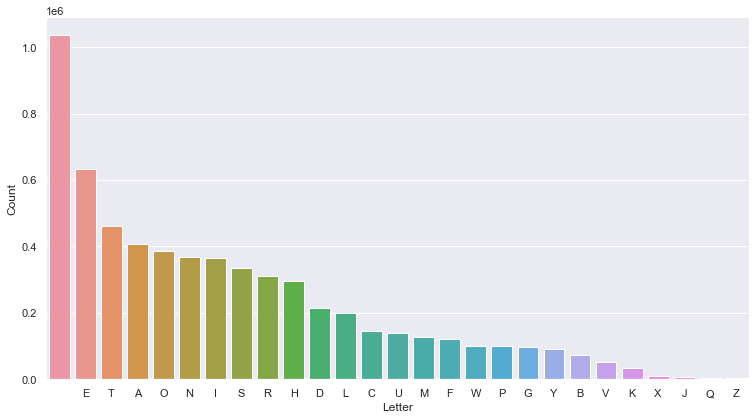

In [10]:
# Count the letter distribution from a big English book
with open('res/big_text.txt', 'r') as big_text:
    full_counts = Counter(big_text.read().upper())
    
    # Eliminate all the characters not in alphabet
    letter_count = { l: full_counts[l] for l in alphabet }
    
# Show the bar plot
df_counts = pd.DataFrame(letter_count.items(), columns=['Letter', 'Count'])
sns.catplot(data=df_counts.sort_values('Count', ascending=False), x='Letter', y='Count', kind='bar', height=6, aspect=16/9)

We can see that, in general, the letters E, T, A, O, N... are the ones that appear more often in English texts. 
In this way, if we have a long enough message we could expect it to have somewhat similar distributions. Let's see an example:

In [11]:
longer_message = "I’m sorry, but I don’t want to be an emperor. That’s not my business. I don’t want to rule or conquer anyone. I should like to help everyone - if possible - Jew, Gentile - black man - white. We all want to help one another. Human beings are like that. We want to live by each other’s happiness - not by each other’s misery. We don’t want to hate and despise one another. In this world there is room for everyone. And the good earth is rich and can provide for everyone. The way of life can be free and beautiful, but we have lost the way.\n" \
+ "Greed has poisoned men’s souls, has barricaded the world with hate, has goose-stepped us into misery and bloodshed. We have developed speed, but we have shut ourselves in. Machinery that gives abundance has left us in want. Our knowledge has made us cynical. Our cleverness, hard and unkind. We think too much and feel too little. More than machinery we need humanity. More than cleverness we need kindness and gentleness. Without these qualities, life will be violent and all will be lost…\n" \
+ "The aeroplane and the radio have brought us closer together. The very nature of these inventions cries out for the goodness in men - cries out for universal brotherhood - for the unity of us all. Even now my voice is reaching millions throughout the world - millions of despairing men, women, and little children - victims of a system that makes men torture and imprison innocent people.\n" \
+ "To those who can hear me, I say - do not despair. The misery that is now upon us is but the passing of greed - the bitterness of men who fear the way of human progress. The hate of men will pass, and dictators die, and the power they took from the people will return to the people. And so long as men die, liberty will never perish…\n" \
+ "Soldiers! don’t give yourselves to brutes - men who despise you - enslave you - who regiment your lives - tell you what to do - what to think and what to feel! Who drill you - diet you - treat you like cattle, use you as cannon fodder. Don’t give yourselves to these unnatural men - machine men with machine minds and machine hearts! You are not machines! You are not cattle! You are men! You have the love of humanity in your hearts! You don’t hate! Only the unloved hate - the unloved and the unnatural! Soldiers! Don’t fight for slavery! Fight for liberty!\n" \
+ "In the 17th Chapter of St Luke it is written: “the Kingdom of God is within man” - not one man nor a group of men, but in all men! In you! You, the people have the power - the power to create machines. The power to create happiness! You, the people, have the power to make this life free and beautiful, to make this life a wonderful adventure.\n" \
+ "Then - in the name of democracy - let us use that power - let us all unite. Let us fight for a new world - a decent world that will give men a chance to work - that will give youth a future and old age a security. By the promise of these things, brutes have risen to power. But they lie! They do not fulfil that promise. They never will!\n" \
+ "Dictators free themselves but they enslave the people! Now let us fight to fulfil that promise! Let us fight to free the world - to do away with national barriers - to do away with greed, with hate and intolerance. Let us fight for a world of reason, a world where science and progress will lead to all men’s happiness. Soldiers! in the name of democracy, let us all unite!"
print(longer_message)

I’m sorry, but I don’t want to be an emperor. That’s not my business. I don’t want to rule or conquer anyone. I should like to help everyone - if possible - Jew, Gentile - black man - white. We all want to help one another. Human beings are like that. We want to live by each other’s happiness - not by each other’s misery. We don’t want to hate and despise one another. In this world there is room for everyone. And the good earth is rich and can provide for everyone. The way of life can be free and beautiful, but we have lost the way.
Greed has poisoned men’s souls, has barricaded the world with hate, has goose-stepped us into misery and bloodshed. We have developed speed, but we have shut ourselves in. Machinery that gives abundance has left us in want. Our knowledge has made us cynical. Our cleverness, hard and unkind. We think too much and feel too little. More than machinery we need humanity. More than cleverness we need kindness and gentleness. Without these qualities, life will be 

In [12]:
def random_alphabet_cipher(message:str, alphabet:list, key_alphabet:list, encrypt=True):
    if encrypt:
        source, target = alphabet, key_alphabet
    else:
        source, target = key_alphabet, alphabet
    
    # Get indices of letter in source alphabet
    positions = [source.index(l) for l in message.upper() if l in source]
    
    # Convert to letters in target alphabet
    letters = [target[n] for n in positions]
    
    return ''.join(letters)
    
# Ensure deterministic runs
seed = 42
random.seed(42)

# Create the random alphabet and encrypt our message
key_alphabet = random.sample(alphabet, k=len(alphabet))

ciphertext = random_alphabet_cipher(longer_message, alphabet, key_alphabet, True)
print('Ciphertext:', ciphertext)

Ciphertext: ZYQPBWWJQDFKQZQXBOKQTUOKQKBQDIQUOQIYSIWBWQKEUKPQOBKQYJQDFPZOIPPQZQXBOKQTUOKQKBQWFNIQBWQABOLFIWQUOJBOIQZQPEBFNXQNZCIQKBQEINSQIGIWJBOIQQZHQSBPPZDNIQQRITQVIOKZNIQQDNUACQYUOQQTEZKIQTIQUNNQTUOKQKBQEINSQBOIQUOBKEIWQEFYUOQDIZOVPQUWIQNZCIQKEUKQTIQTUOKQKBQNZGIQDJQIUAEQBKEIWPQEUSSZOIPPQQOBKQDJQIUAEQBKEIWPQYZPIWJQTIQXBOKQTUOKQKBQEUKIQUOXQXIPSZPIQBOIQUOBKEIWQZOQKEZPQTBWNXQKEIWIQZPQWBBYQHBWQIGIWJBOIQUOXQKEIQVBBXQIUWKEQZPQWZAEQUOXQAUOQSWBGZXIQHBWQIGIWJBOIQKEIQTUJQBHQNZHIQAUOQDIQHWIIQUOXQDIUFKZHFNQDFKQTIQEUGIQNBPKQKEIQTUJVWIIXQEUPQSBZPBOIXQYIOPQPBFNPQEUPQDUWWZAUXIXQKEIQTBWNXQTZKEQEUKIQEUPQVBBPIPKISSIXQFPQZOKBQYZPIWJQUOXQDNBBXPEIXQTIQEUGIQXIGINBSIXQPSIIXQDFKQTIQEUGIQPEFKQBFWPINGIPQZOQYUAEZOIWJQKEUKQVZGIPQUDFOXUOAIQEUPQNIHKQFPQZOQTUOKQBFWQCOBTNIXVIQEUPQYUXIQFPQAJOZAUNQBFWQANIGIWOIPPQEUWXQUOXQFOCZOXQTIQKEZOCQKBBQYFAEQUOXQHIINQKBBQNZKKNIQYBWIQKEUOQYUAEZOIWJQTIQOIIXQEFYUOZKJQYBWIQKEUOQANIGIWOIPPQTIQOIIXQCZOXOIPPQUOXQVIOKNIOIPPQTZKEBFKQKEIPIQLFUNZKZIPQNZHIQTZNNQDIQGZBNIOKQUOXQUNNQTZNNQDIQNBPKKE

Now, we try to see if applying the distributions from our previous counts gives us something close to the original message.

In [13]:
cipher_letter_count = Counter(ciphertext)

# We get the original alphabet sorted by letter distribution
original_alphabet = sorted(letter_count.items(), key=lambda x: x[1], reverse=True)
original_alphabet, _ = zip(*original_alphabet)
print("Original alphabet sorted by letter distribution:\n", original_alphabet)

Original alphabet sorted by letter distribution:
 (' ', 'E', 'T', 'A', 'O', 'N', 'I', 'S', 'R', 'H', 'D', 'L', 'C', 'U', 'M', 'F', 'W', 'P', 'G', 'Y', 'B', 'V', 'K', 'X', 'J', 'Q', 'Z')


In [14]:
# And we get the alphabet of the ciphertext in a similar order
cipher_alphabet = sorted(cipher_letter_count.items(), key=lambda x: x[1], reverse=True)
cipher_alphabet, _ = zip(*cipher_alphabet)

# We just add dashes for the letters that we didn't see
alphabet_difference = len(original_alphabet) - len(cipher_alphabet)
if alphabet_difference > 0:
    cipher_alphabet = cipher_alphabet + ('-', ) * alphabet_difference
print("Possible key derived from letter distribution:\n", cipher_alphabet)

Possible key derived from letter distribution:
 ('Q', 'I', 'K', 'B', 'O', 'U', 'Z', 'E', 'P', 'W', 'N', 'X', 'F', 'T', 'Y', 'J', 'H', 'S', 'A', 'G', 'V', 'D', 'C', 'L', 'R', '-', '-')


In [15]:
# Now we try to decipher the text
possible_plaintext = random_alphabet_cipher(ciphertext, original_alphabet, cipher_alphabet, False)
original_plaintext = random_alphabet_cipher(ciphertext, alphabet, key_alphabet, False)

letters_to_show = 100
print('Original:', original_plaintext[:letters_to_show], "...")
print('Possible:', possible_plaintext[:letters_to_show], "...")

Original: IM SORRY BUT I DONT WANT TO BE AN EMPEROR THATS NOT MY BUSINESS I DONT WANT TO RULE OR CONQUER ANYON ...
Possible: IM RAHHF VCT I LAOT UNOT TA VE NO EMPEHAH TSNTR OAT MF VCRIOERR I LAOT UNOT TA HCDE AH GAOXCEH NOFAO ...


---
While this is not a perfect attack you can start doing manual guessing with this starting point, and eventually get the original plaintext. Also, the bigger the message the more easily it will be reconstructed via this method.

## Is it possible to have perfect secrecy?

The idea would be that an attacker with access to the ciphertext cannot guess anything about the original message. So, could it be
possible to achieve this in reality? And the answer is, surprisingly, yes!

The one-time pad is a cipher that allows for the encryption of a message with perfect secrecy. An attacker cannot gain any additional
information from inspecting the message, regardless of the size. Let's see an example:

In [16]:
# Secret message
very_secret_message = 'Without purpose, we would not exist. It is purpose that created us. Purpose that connects us. Purpose that pulls us. That guides us. That drives us. It is purpose that defines us. Purpose that binds us.'
print(very_secret_message)

Without purpose, we would not exist. It is purpose that created us. Purpose that connects us. Purpose that pulls us. That guides us. That drives us. It is purpose that defines us. Purpose that binds us.


In [17]:
# Generate a secret key
secret_key = random.choices(alphabet, k=len(very_secret_message))
secret_key = ''.join(secret_key)
print(secret_key)

VAVSJEZJCCWQVTO KOWQXPTBGHCGCHRJJFHZRQETEK RPSWUGAIHFZXIRKYMHGPHPYKF NCBCQVLBK O XATSOHRDLMZXHNEYXIRQEUOVOAIAZXWIBXZCNBUUDMOHXLFOTFI RLNDGJPGFBRGYXBGSFDZPMVVFCLLMTS CKJXGFMLHGYLXOB W ZWENFKBK HVMLZ PTEI


In [18]:
# Implement the one-time pad cipher
def otp_cipher(msg:str, key:str, alphabet:list, encrypt:bool=True):
    result = list()
    prepared_message = [m for m in msg.upper() if m in alphabet]
    prepared_key = [k for k in key]
    
    for m, k in zip(prepared_message, prepared_key):
        m_index = alphabet.index(m)
        k_index = alphabet.index(k)
        
        if encrypt:
            c_index = (m_index + k_index) % len(alphabet)
        else:
            c_index = (m_index - k_index) % len(alphabet)
        result.append(alphabet[c_index])
    
    return ''.join(result)

ciphertext = otp_cipher(very_secret_message, secret_key, alphabet)
print('Ciphertext:', ciphertext)

Ciphertext: QINZXYRIRWMEIKSZFSVLKIDEFUQZBLNRAYGGJPMKDZTHDFNYFTPHYYZZVKQQKFIZOMDWOAUFBIBLUJBBMJEVKFGKVKASNWAWBWAYQXTCOZL  SOVAIXRBTVBXHDNAOKYVTYHCHTHHYIIYEJJFFOAVLWSMGQUNMCDKPXXHPOAW XL AXMZOSASC RVFVSNTJTZ


Normally the one-time pad cipher would work at a binary level, applying the XOR function between the message and the key. In this case we are evaluating a 
simplified version of it operations at the character level. We are interpreting the key as rotations, according to their position in the alphabet.
- 'A' means a rotation of 0, keeping the original letter as is
- 'B' means a rotation of 1, adding one to the letter (e.g. R becomes S)
- 'C' means a rotation of 2, adding two to the letter (e.g. R becomes T)
- ...

![OTP rotation example](img/cryptography-otp.png)

Decrypting the message requires to apply the opposite operation to the ciphertext. An 'A' substracts 0 to the letter, a 'B' subtracts 1, and so on.

In [19]:
original_message = otp_cipher(ciphertext, secret_key, alphabet, False)
print('Original message:', original_message)

Original message: WITHOUT PURPOSE WE WOULD NOT EXIST IT IS PURPOSE THAT CREATED US PURPOSE THAT CONNECTS US PURPOSE THAT PULLS US THAT GUIDES US THAT DRIVES US IT IS PURPOSE THAT DEFINES US PURPOSE THAT BINDS US


---
This sounds like a perfect scenario, we can actually achieve perfect secrecy with an algorithm like this. So, why don't we use it everywhere?
One-Time Pad (or OTP) requires some of the following conditions to be met in order to be useful:
- The key must be randomly generated
- The key must be used only once
- The key must be the same size as the message

We can start seeing some drawbacks from these conditions. The first two are somewhat manageable as long as we have a good source of randomness (pseudo-random 
is NOT good enough) and we have a way of generating keys. The third makes things more complicated, as it adds a 100% overhead to each message.
To transmit a 1GiB message we would need a 1GiB key!

Now, let's say these issues are managed, we still have one big issue that is inherent of the whole `symmetric cryptography` part. 
**How do we get the key to our receiver?**

## The key distribution problem

If we want to send an encrypted message to another person we know that we are communicating through an insecure channel. In order to share a key
we would need to use a secure channel to send it, but if we have access to a secure channel then we could use it to send our original message and
we no longer have the need for encryption. This is specially hard for OTP where we cannot use any key twice. 

This is called the **key distribution problem**. How do we get the key to our receiver?

Now, imagining that there is a way to distribute the keys, we have one last underlying issue: the amount of keys that we have to handle. For
each communication we need a new different key so, to enable a group of people to communicate with each other, we would need a key for each communication pair:

![Key distribution - Number of keys](img/cryptography-symmetric-keys.png)

The amount of keys grows $ \frac{n(n-1)}{2} $ where n is the amount of people.

---
Lucky for use there is a way around this using mathematics: [asymmetric cryptography](2-Asymmetric-cryptography.ipynb).

## Substitution and transposition: the building blocks of symmetric cryptography

TODO?